In [1]:
%run ./prepare_data.ipynb
import networkx as nx
import matplotlib.pyplot as plt

# Graphs <a class="anchor" id="appendix"></a>

In [2]:
# first dumb graph, ignores weights
G = nx.from_pandas_edgelist(df_raw, 'Player', 'Guess',)

# and now we try multigraph
M = nx.from_pandas_edgelist(df_raw, 'Player', 'Guess', create_using=nx.MultiDiGraph())


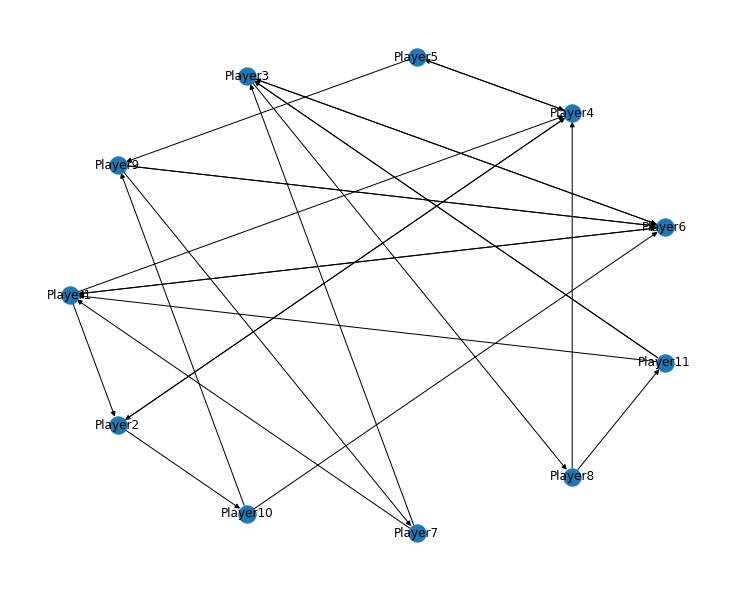

In [3]:
# plot spacy multigraph of who voted for whom
plt.figure(figsize=(10, 8))
nx.draw_shell(M, with_labels=True)

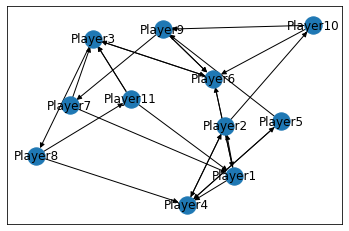

In [4]:
# a bit more dense
nx.draw_networkx(M)

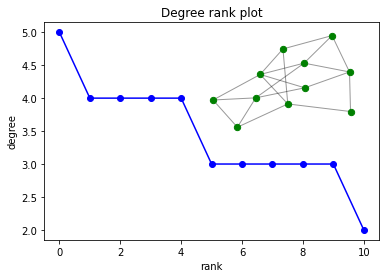

In [5]:
# another look via degree sequences
# source: from networkx gallery

degree_dist = sorted([vote for player, vote in G.degree()], reverse=True)
dmax = max(degree_dist)

plt.plot(degree_dist, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
# not implemented for directed graph?
plt.axes([0.5, 0.5, 0.35, 0.35])
g_cc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=False)[0])
pos = nx.spring_layout(g_cc)
plt.axis("off")
nx.draw_networkx_nodes(g_cc, pos, node_size=40, node_color="green")
nx.draw_networkx_edges(g_cc, pos, arrowstyle="->", arrowsize=10, alpha=0.4)